In [2]:
import ROOT
import uproot3
import os

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  x86_64-linux-gnu-g++-7  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.19/01


Set Atlas style

In [3]:
print(ROOT.gROOT.GetMacroPath())
from ROOT import gROOT
atlasrootstyle_path = os.environ['HOME']+'/.local/opt/atlasstyle-00-03-05'
gROOT.SetMacroPath(os.pathsep.join([gROOT.GetMacroPath(), atlasrootstyle_path ]))
gROOT.LoadMacro("AtlasLabels.C")
gROOT.LoadMacro("AtlasStyle.C")
gROOT.LoadMacro("AtlasUtils.C")

ROOT.SetAtlasStyle()

.:/home/ali/build_root/macros

Applying ATLAS style settings...



In [4]:
slice_ = 'ad'


if slice_=="250_10":
    InputFile_post = "root_files/suppr250_bornktmin10_100M_ParsiParams_posthadron_merged.root"
    InputFile_pre = "root_files/suppr250_bornktmin10_100M_ParsiParams_prehadron_merged.root"

if slice_=="800_600":
    InputFile_post = "root_files/suppr800_bornktmin600_1B_ParisParams_MSTP_posthadron_merged.root"
    InputFile_pre = "root_files/suppr800_bornktmin600_1B_ParisParams_MSTP_prehadron_merged.root"

if slice_ =="160_5":
    InputFile_post = "root_files/suppr160_bornktmin5_1B_ParsiParams_MSTP_posthadron_merged.root"
    InputFile_pre = "root_files/suppr160_bornktmin5_1B_ParsiParams_MSTP_prehadron_merged.root"
else:
    InputFile_post = '/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/Paris_CUETP8M_10T_posthadron_merged.root'
    InputFile_pre = '/home/ali/Desktop/Pulled_Github_Repositories/NPCorrection_InclusiveJets/rivet+pythia/PYTHIA_STANDALONE/Paris_CUETP8M_10T/Paris_CUETP8M_10T_prehadron_merged.root'
    
    
    

f_post = ROOT.TFile.Open(InputFile_post, 'READ')
f_pre = ROOT.TFile.Open(InputFile_pre, 'READ')

fu = uproot3.open(InputFile_post)
fu["CMS_2021_I1972986"].keys()

[b'd01-x01-y01;1',
 b'd21-x01-y01;1',
 b'd02-x01-y01;1',
 b'd22-x01-y01;1',
 b'd03-x01-y01;1',
 b'd23-x01-y01;1',
 b'd04-x01-y01;1',
 b'd24-x01-y01;1']

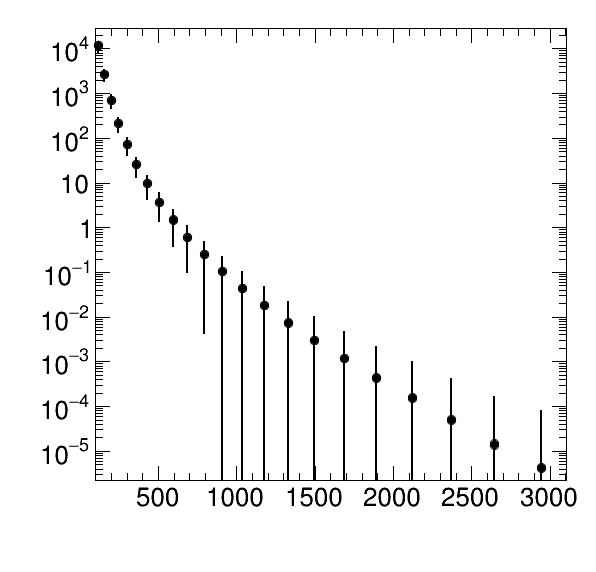

In [5]:
hist_post = f_post.Get("CMS_2021_I1972986/d01-x01-y01")
hist_pre = f_pre.Get("CMS_2021_I1972986/d01-x01-y01")

c = ROOT.TCanvas("", "", 600, 600)
c.SetLogy()

c.Draw()
hist_post.Draw("SAME")
hist_pre.Draw("SAME")



Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file ad_1B_NPC_ROOT.png has been created


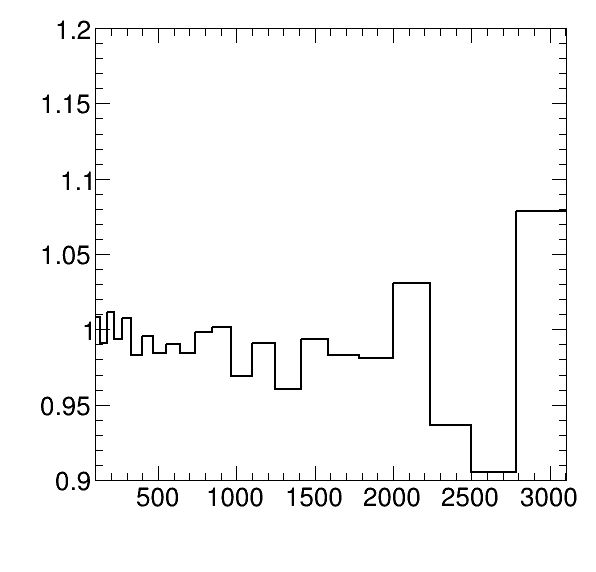

In [6]:
ratio_hist = hist_post.Clone("ratio_hist")
RANGE=(0.9,1.2)
ratio_hist.SetMinimum(RANGE[0])
ratio_hist.SetMaximum(RANGE[1])
x=ratio_hist.GetXaxis()
ratio_hist.SetAxisRange(100,3000)

ratio_hist.Sumw2()
ratio_hist.Divide(hist_pre)
c = ROOT.TCanvas("", "", 600, 600)

c.Draw()


ratio_hist.Draw("hist")
c.SaveAs('%s_1B_NPC_ROOT.png' % slice_)

In [7]:
ratio_hist.SetAxisRange(0,800)